In [4]:
!pip install wordcloud

   ---------------------------------------- 0.0/301.2 kB ? eta -:--:--
   -- ------------------------------------ 20.5/301.2 kB 320.0 kB/s eta 0:00:01
   -------------- ------------------------- 112.6/301.2 kB 1.3 MB/s eta 0:00:01
   ---------------------------------------- 301.2/301.2 kB 2.3 MB/s eta 0:00:00


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Shivprasad\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Missing values:
 entity         0
sentiment      0
content      686
dtype: int64


C:\Users\Shivprasad\AppData\Local\Temp\ipykernel_30512\450390816.py:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sentiment', data=df, palette='Set2')


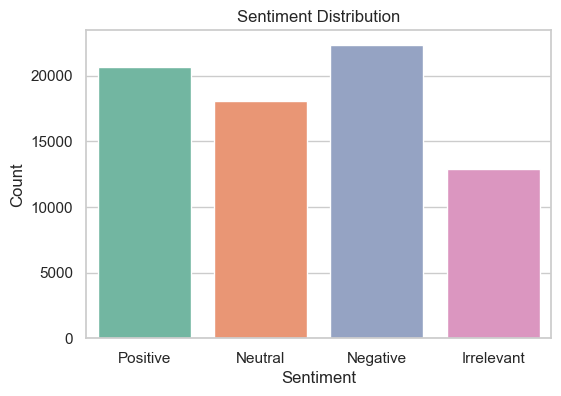

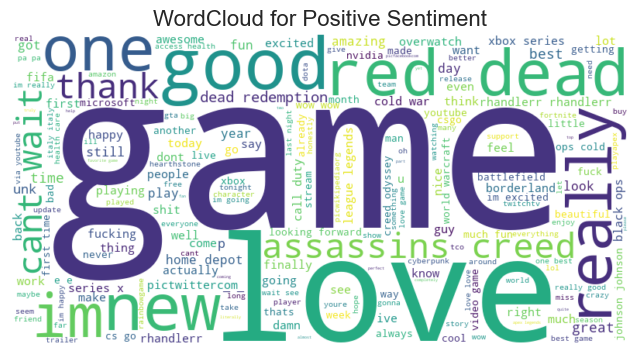

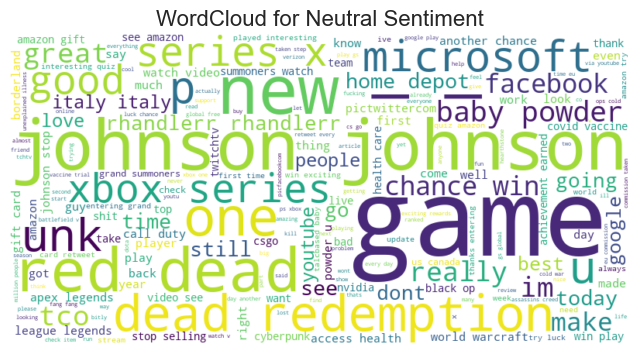

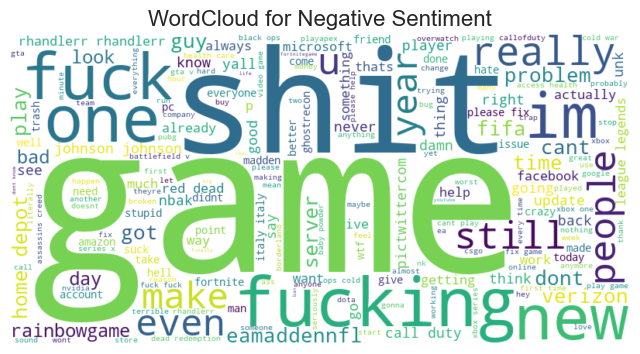

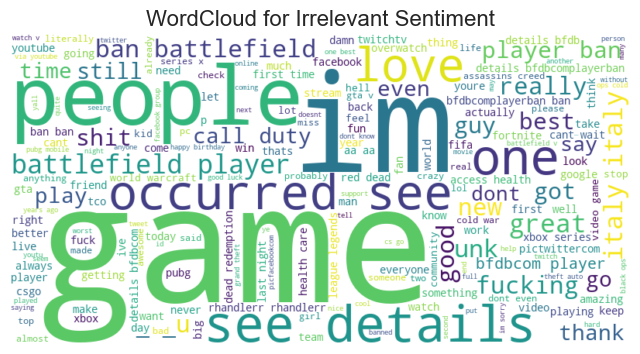

C:\Users\Shivprasad\AppData\Local\Temp\ipykernel_30512\450390816.py:67: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='count', y='entity', data=top, palette='coolwarm')


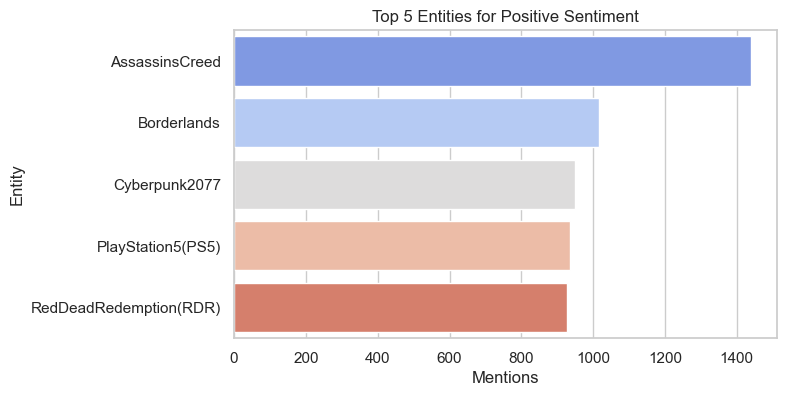

C:\Users\Shivprasad\AppData\Local\Temp\ipykernel_30512\450390816.py:67: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='count', y='entity', data=top, palette='coolwarm')


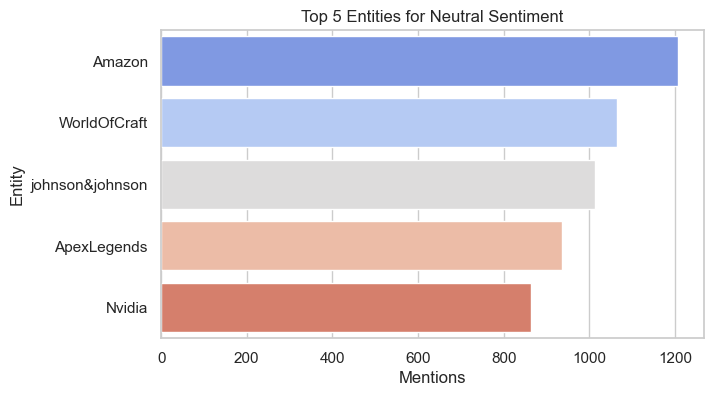

C:\Users\Shivprasad\AppData\Local\Temp\ipykernel_30512\450390816.py:67: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='count', y='entity', data=top, palette='coolwarm')


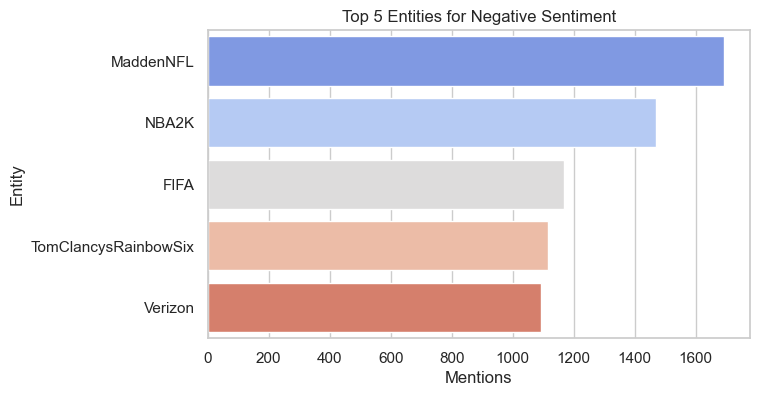

C:\Users\Shivprasad\AppData\Local\Temp\ipykernel_30512\450390816.py:67: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='count', y='entity', data=top, palette='coolwarm')


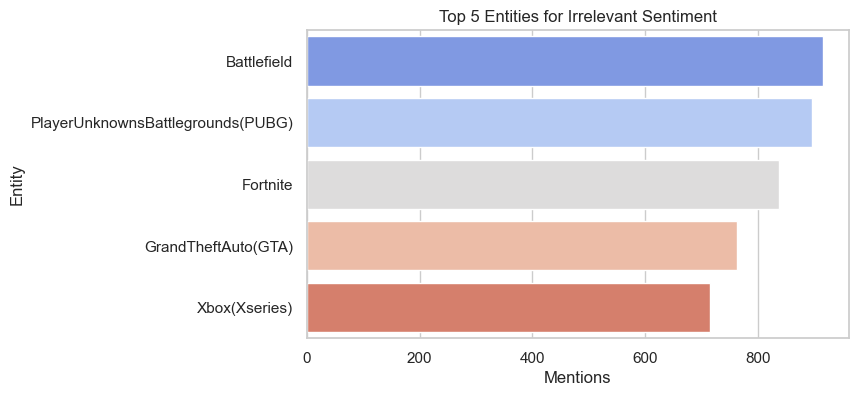

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
import re

# Download stopwords
nltk.download('stopwords')

# Load dataset (ensure the CSV is in your working directory)
df = pd.read_csv("C:/Users/Shivprasad/Downloads/twitter_training/twitter_training.csv", header=None)

# Rename columns
df.columns = ['id', 'entity', 'sentiment', 'content']

# Drop 'id' column as it's not useful
df.drop('id', axis=1, inplace=True)

# Check for missing values
print("Missing values:\n", df.isnull().sum())

# Drop rows with missing text
df.dropna(subset=['content'], inplace=True)

# Clean the text
def clean_text(text):
    if isinstance(text, str):
        text = text.lower()
        text = re.sub(r"http\S+|www\S+|https\S+", '', text, flags=re.MULTILINE)
        text = re.sub(r'\@w+|\#','', text)
        text = re.sub(r'[^\w\s]', '', text)
        text = re.sub(r'\d+', '', text)
        text = " ".join([word for word in text.split() if word not in stopwords.words('english')])
        return text
    return ""

df['clean_content'] = df['content'].apply(clean_text)

# Sentiment distribution
plt.figure(figsize=(6,4))
sns.countplot(x='sentiment', data=df, palette='Set2')
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()

# WordClouds for each sentiment
for sentiment in df['sentiment'].unique():
    text = " ".join(df[df['sentiment'] == sentiment]['clean_content'])
    plt.figure(figsize=(8,5))
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"WordCloud for {sentiment} Sentiment", fontsize=16)
    plt.show()

# Top entities per sentiment
top_entities = df.groupby(['sentiment', 'entity']).size().reset_index(name='count')
top_entities = top_entities.sort_values(['sentiment', 'count'], ascending=[True, False])

# Plot top 5 entities per sentiment
for sentiment in df['sentiment'].unique():
    top = top_entities[top_entities['sentiment'] == sentiment].head(5)
    plt.figure(figsize=(7,4))
    sns.barplot(x='count', y='entity', data=top, palette='coolwarm')
    plt.title(f"Top 5 Entities for {sentiment} Sentiment")
    plt.xlabel("Mentions")
    plt.ylabel("Entity")
    plt.show()
